# Convergence of 3D tweezer potential

In [1]:
# Directives on Jupyter
%reset
# Auto reload bootstrap.py
%load_ext autoreload
%autoreload 2

import numpy as np

## Lifetime fitting

Test case for 1D

/storage/hpc/work/kh30/hw50/DVR/src/dynamics.py:123: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if t is 0:


param_set: model is Gaussian potential.
['x']-reflection symmetry is used.
1D N=20 R0=[3.]w
freq=[39.4]kHz
Gaussian potential starts.
n=[26], dx=[0.15]w, p=[0], model=Gaussian,
t=[0.],
t_step=[0.]
starts.
Matrix size= 53
Estimated full matrix memory usage, float: 0.02 MiB, complex: 0.04 MiB
Parameter setting time: 0.00s.

init_state: initial state of T+0.5V is calculated.
H_mat: n=[26] dx=[0.15]w p=[0] Gaussian starts.
H_mat: H matrix memory usage: 0.04 MiB.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.01s.
H_solver: eigenstates memory usage: 0.04 MiB.
Initial state preparation finished. Time spent: 0.01s.

H_mat: n=[26] dx=[0.15]w p=[0] Gaussian starts.
H_mat: H matrix memory usage: 0.04 MiB.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.00s.
H_solver: eigenstates memory usage: 0.04 MiB.
H_mat: n=[26] dx=[0.15]w p=[0] Gaussian starts.
H_mat: H matrix memory usage: 0.04 MiB.
H_solver: free particle Hamiltonian solved. Time spent: 0.00s.
H_solver: eigenstates memory usage

([<matplotlib.figure.SubFigure at 0x7f3cea3845e0>],
 [[<AxesSubplot:title={'center':'1D Gaussian gs population \nw/ freq=39.400kHz $R_0$=[3.]w'}, xlabel='t/s', ylabel='$\\rho$'>]])

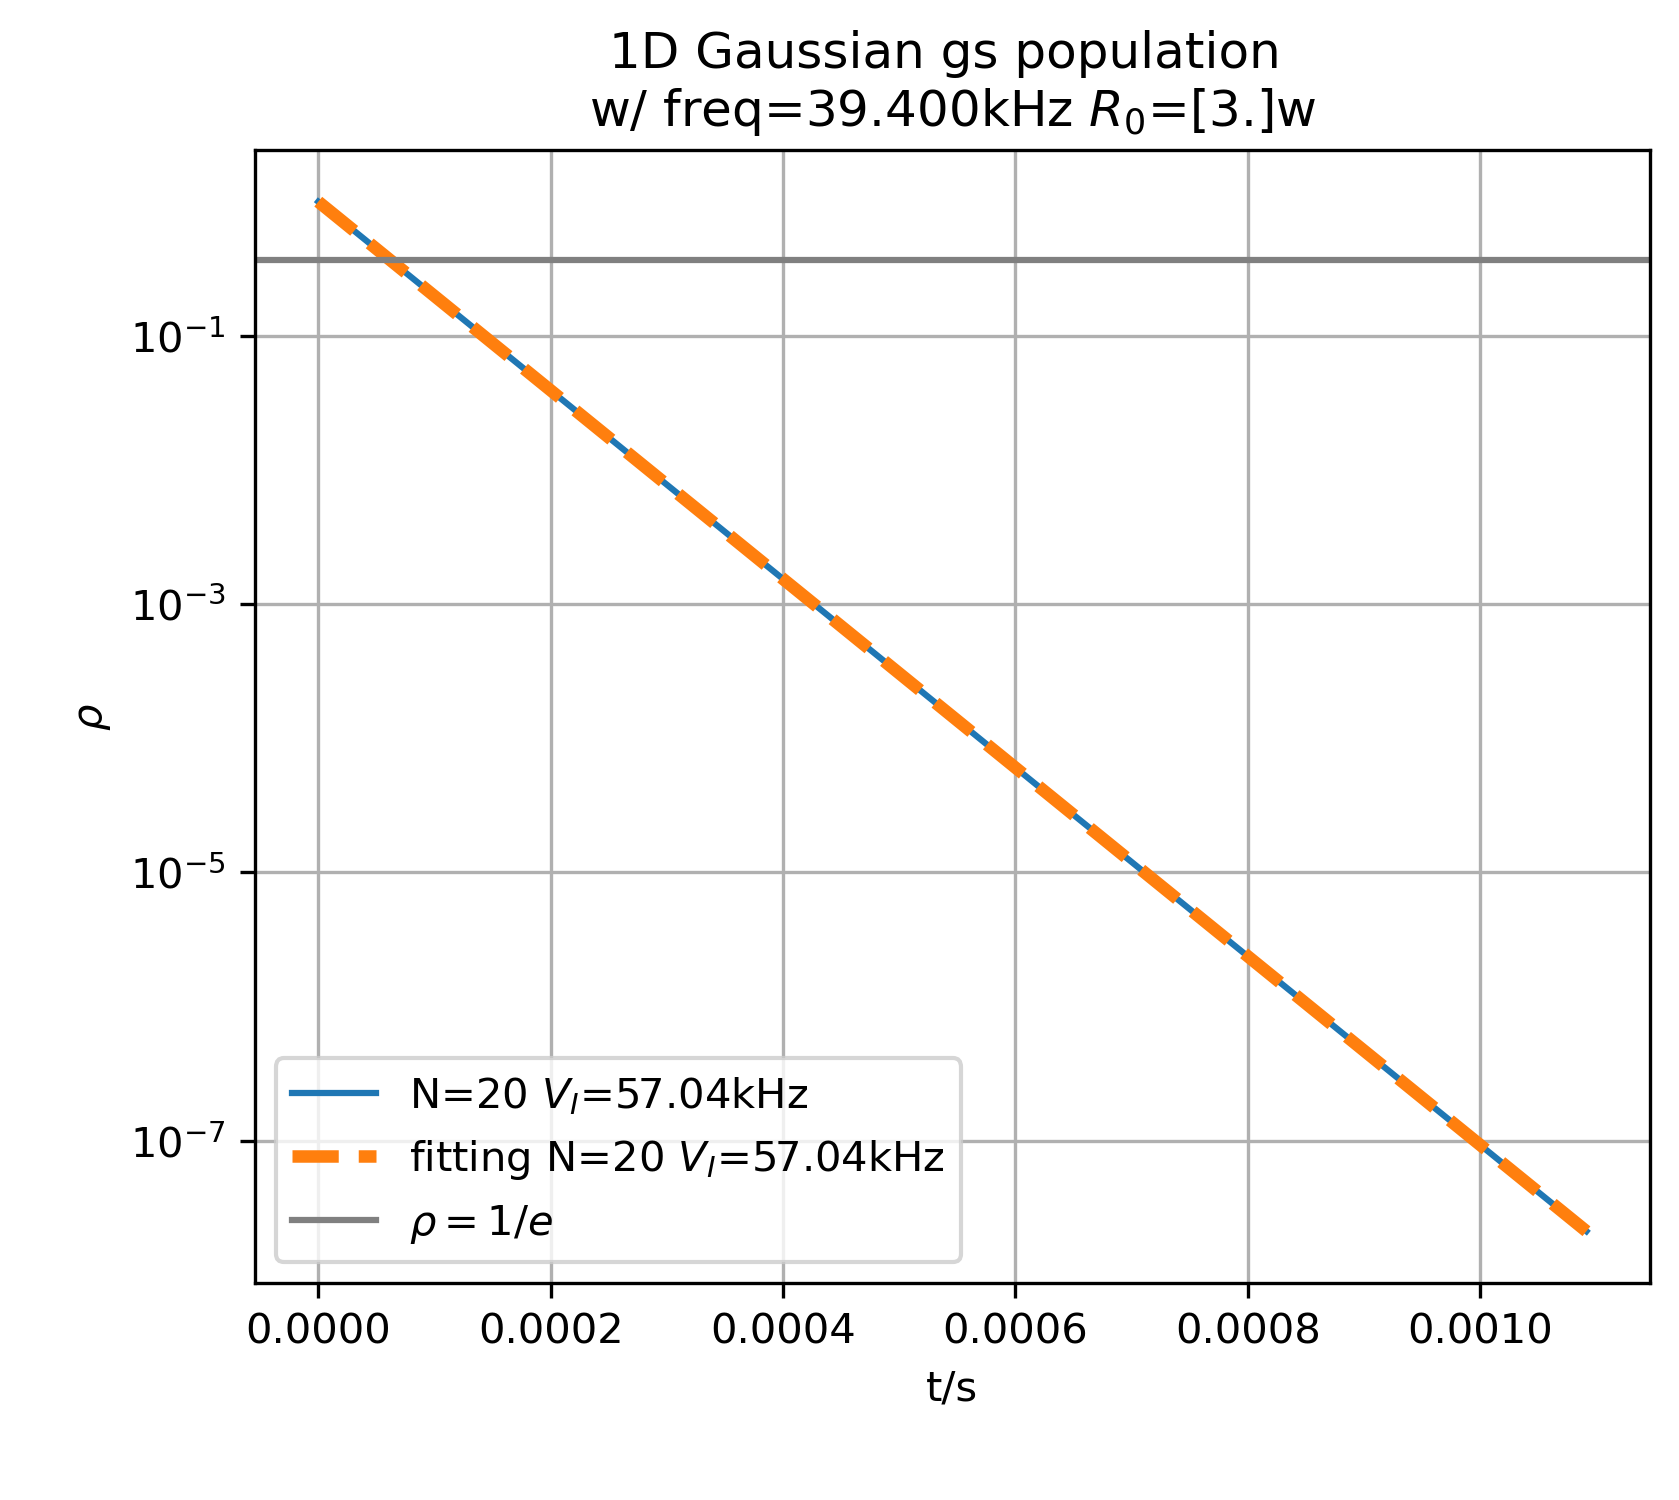

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from DVR_exe import *
import os
from plot_dynamics import *

N = 20
freq = 39.4
os.system(
    'python3 -u dynamics_exe.py -a -n {} -d 1 -m Gaussian -f {}'.format(
        N, freq))
os.system('mv *.h5 ../output')

N_list = range(N, N + 1, 2)
R = 3 * np.array([1, 1, 2.4])
freq_list = np.array([freq])
an = 0
length = 1
sn = 1000.0

p = plot(cvg='N',
         quantity='gs',
         N=N,
         R0=R,
         freq_list=freq_list,
         dim=1,
         model='Gaussian',
         wavefunc=False,
         realtime=False,
         symmetry=True,
         absorber=True)

plot_dynamics(N_list,
              R0_list=[R for i in range(len(N_list))],
              dvr=p,
              length=length,
              avg_no=an,
              fit=True)

3D

param_set: model is Gaussian potential.
DVR: dx=[0.17 0.17 0.4 ]w is set.
DVR: n=[18 18 18] is set.
DVR: R0=[3.  3.  7.2]w is set.
DVR: Absorber width LI=1w
DVR: n is set to [24 24 20] by adding absorber.
DVR: R=[4. 4. 8.]w is set.
['x' 'y' 'z']-reflection symmetry is used.
DVR: dx=[0.19 0.19 0.45]w is set.
DVR: n=[16 16 16] is set.
DVR: R0=[3.  3.  7.2]w is set.
DVR: Absorber width LI=1w
DVR: n is set to [21 21 18] by adding absorber.
DVR: R=[3.94 3.94 8.1 ]w is set.
DVR: dx=[0.19 0.19 0.45]w is set.
DVR: n=[16 16 16] is set.
DVR: R0=[3.  3.  7.2]w is set.
DVR: Absorber width LI=1w
DVR: n is set to [21 21 18] by adding absorber.
DVR: R=[3.94 3.94 8.1 ]w is set.
DVR: dx=[0.19 0.19 0.45]w is set.
DVR: n=[16 16 16] is set.
DVR: R0=[3.  3.  7.2]w is set.
DVR: Absorber width LI=1w
DVR: n is set to [21 21 18] by adding absorber.
DVR: R=[3.94 3.94 8.1 ]w is set.
DVR: dx=[0.19 0.19 0.45]w is set.
DVR: n=[16 16 16] is set.
DVR: R0=[3.  3.  7.2]w is set.
DVR: Absorber width LI=1w
DVR: n is set 

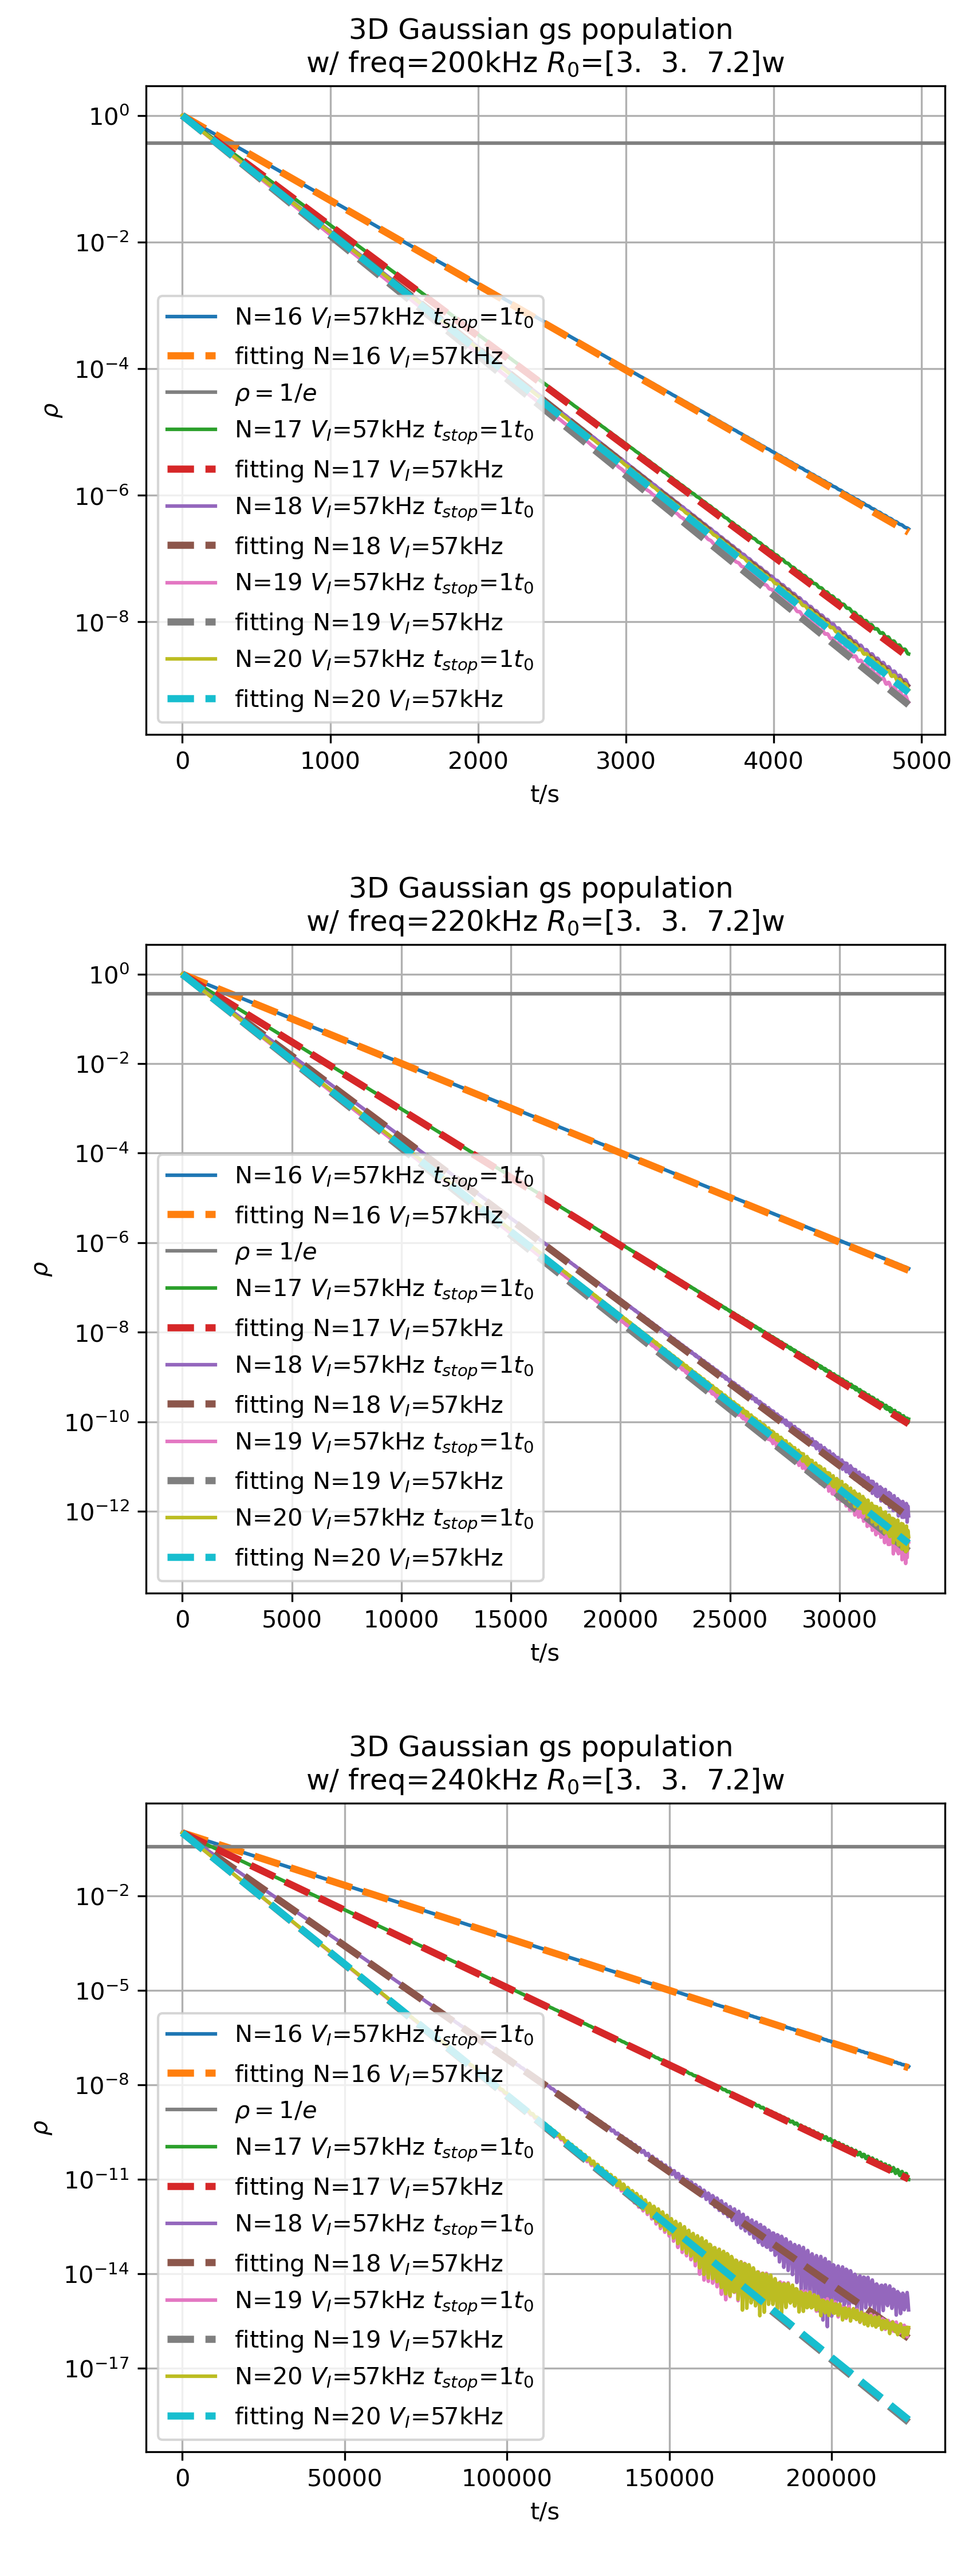

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from DVR_exe import *
import os
from plot_dynamics import *

N_list = range(16, 21, 1)
N = 18
# N_list = range(N, N + 1, 2)
R = 3 * np.array([1, 1, 2.4])
freq_list = np.arange(200, 250, 20)
an = 0
length = 1
sn = 1000.0

p = plot(
    cvg='N',
    quantity='gs',
    N=N,
    R0=R,
    #  trap=(156, 1.18E-6),
    freq_list=freq_list,
    dim=3,
    model='Gaussian',
    wavefunc=True,
    realtime=False,
    symmetry=True,
    absorber=True)

ax = None
for i in range(len(N_list)):
    ax = plot_dynamics([N_list[i]],
                       R0_list=[R for i in range(len([N_list[i]]))],
                       ax=ax,
                       dvr=p,
                       length=length,
                       avg_no=an,
                       fit=True)


## Lifetime vs Driving frequency

### Varying N

In [1]:
from plot_dynamics import *
import numpy as np
import matplotlib.pyplot as plt
from DVR_exe import *
import os

N_list = range(16, 21, 1)
N = 18
R = 3 * np.array([1, 1, 2.4])
freq_list = np.arange(100, 250, 10)
an = 0
t0 = 17.9
length = 1
sn = 1000.0

p = plot(cvg='N',
         quantity='gs',
         N=N,
         R0=R,
         freq_list=freq_list,
         dim=3,
         model='Gaussian',
         wavefunc=True,
         realtime=False,
         symmetry=True,
         absorber=True)

ax = plot_lifetime(
    N_list,
    R0_list=[R for i in range(len(N_list))],
    dvr=p,
    avg_no=an,
    length=2,
    #  tau=t0,
    #  file=True,
    extrapolte=-3)


param_set: model is Gaussian potential.
DVR: dx=[0.16666667 0.16666667 0.4       ]w is set.
DVR: n=[18 18 18] is set.
DVR: R0=[3.  3.  7.2]w is set.
DVR: Absorber width LI=1w
DVR: n is set to [24 24 20] by adding absorber.
DVR: R=[4. 4. 8.]w is set.
['x' 'y' 'z']-reflection symmetry is used.
DVR: dx=[0.1875 0.1875 0.45  ]w is set.
DVR: n=[16 16 16] is set.
DVR: R0=[3.  3.  7.2]w is set.
DVR: Absorber width LI=1w
DVR: n is set to [21 21 18] by adding absorber.
DVR: R=[3.9375 3.9375 8.1   ]w is set.
DVR: dx=[0.18 0.18 0.42]w is set.
DVR: n=[17 17 17] is set.
DVR: R0=[3.  3.  7.2]w is set.
DVR: Absorber width LI=1w
DVR: n is set to [23 23 19] by adding absorber.
DVR: R=[4.06 4.06 8.05]w is set.
DVR: dx=[0.17 0.17 0.4 ]w is set.
DVR: n=[18 18 18] is set.
DVR: R0=[3.  3.  7.2]w is set.
DVR: Absorber width LI=1w
DVR: n is set to [24 24 20] by adding absorber.
DVR: R=[4. 4. 8.]w is set.
DVR: dx=[0.16 0.16 0.38]w is set.
DVR: n=[19 19 19] is set.
DVR: R0=[3.  3.  7.2]w is set.
DVR: Absorber wi

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = '../output/[21 21 18] [0.19 0.19 0.45] 104.52 18903.6 100 0.2 0.00019 Gaussian sym ab 1 0.55.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

### Varying R

param_set: model is Gaussian potential.
DVR: dx=[0.17 0.17 0.4 ]w is set.
DVR: n=[18 18 18] is set.
DVR: R0=[3.  3.  7.2]w is set.
DVR: Absorber width LI=1w
DVR: n is set to [24 24 20] by adding absorber.
DVR: R=[4. 4. 8.]w is set.
['x' 'y' 'z']-reflection symmetry is used.
DVR: dx=[0.17 0.17 0.4 ]w is set.
DVR: n=[12 12 12] is set.
DVR: R0=[2.  2.  4.8]w is set.
DVR: Absorber width LI=1w
DVR: n is set to [18 18 14] by adding absorber.
DVR: R=[3.  3.  5.6]w is set.
DVR: dx=[0.17 0.17 0.4 ]w is set.
DVR: n=[14 14 14] is set.
DVR: R0=[2.33 2.33 5.6 ]w is set.
DVR: Absorber width LI=1w
DVR: n is set to [20 20 16] by adding absorber.
DVR: R=[3.33 3.33 6.4 ]w is set.
DVR: dx=[0.17 0.17 0.4 ]w is set.
DVR: n=[16 16 16] is set.
DVR: R0=[2.67 2.67 6.4 ]w is set.
DVR: Absorber width LI=1w
DVR: n is set to [22 22 18] by adding absorber.
DVR: R=[3.67 3.67 7.2 ]w is set.
DVR: dx=[0.17 0.17 0.4 ]w is set.
DVR: n=[18 18 18] is set.
DVR: R0=[3.  3.  7.2]w is set.
DVR: Absorber width LI=1w
DVR: n is s

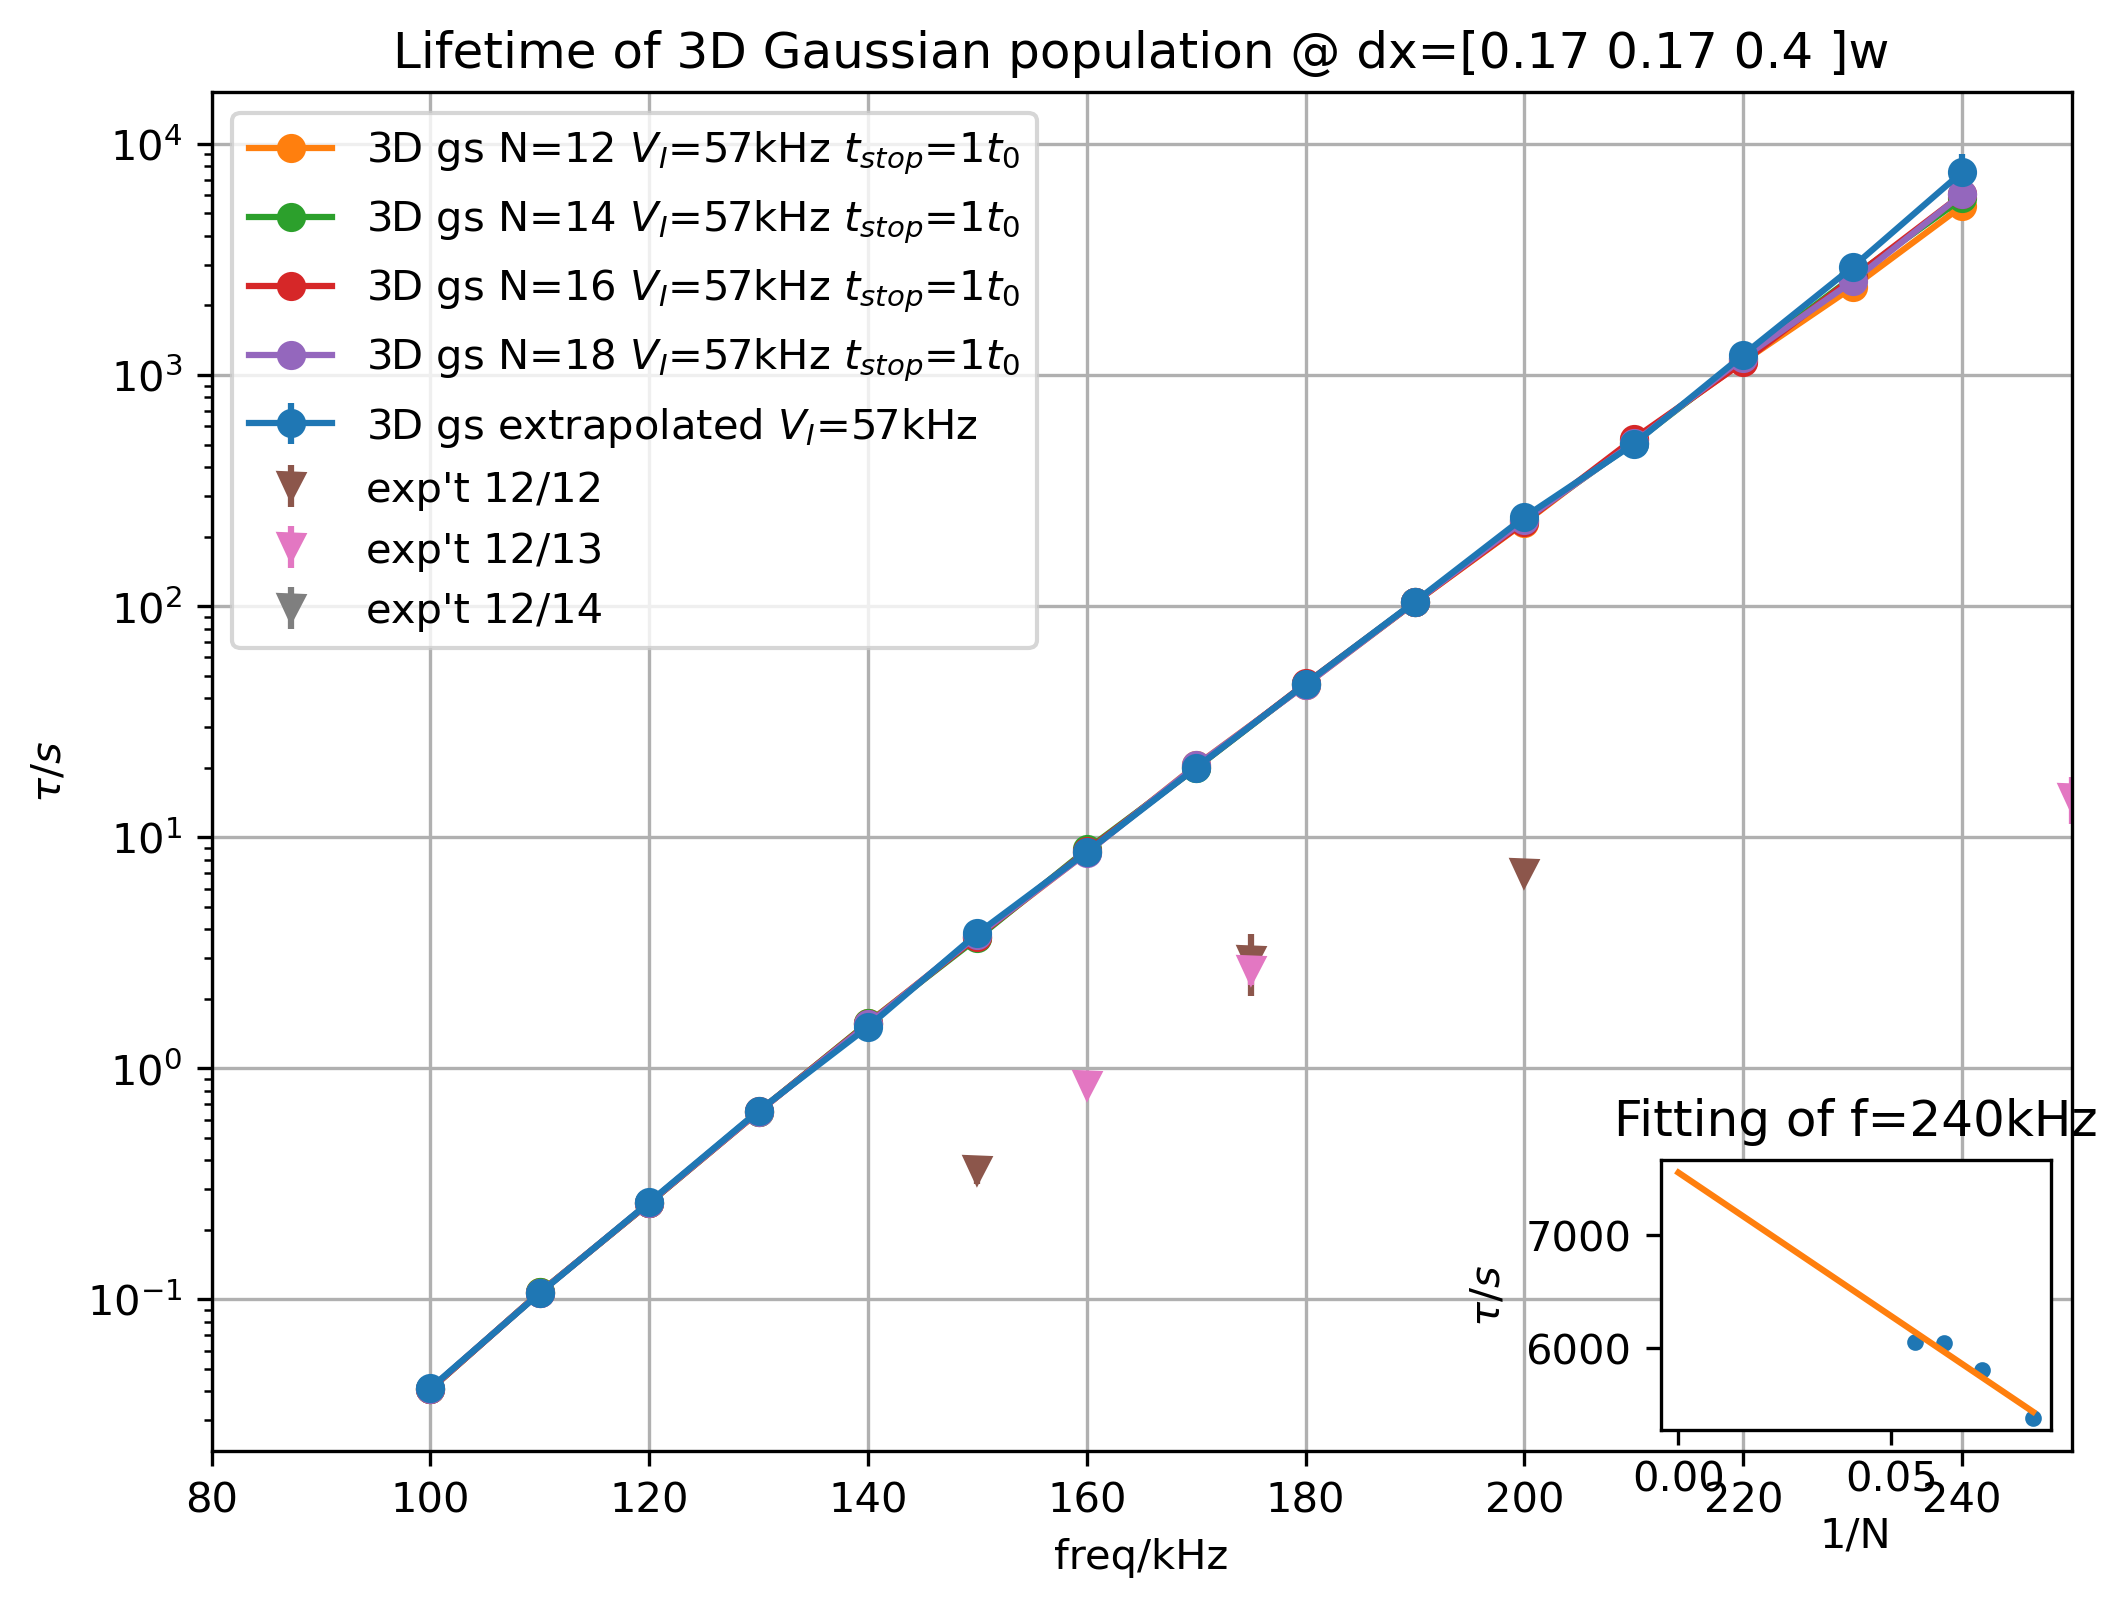

In [7]:
from plot_dynamics import *
import numpy as np
import matplotlib.pyplot as plt
from DVR_exe import *
import os

N_list = np.arange(12, 19, 2)
dx = 3 / 18 * np.array([1, 1, 2.4], dtype=float)
R = dx * 18
N = 18
R0_list = [dx * n for n in N_list]
freq_list = np.arange(100, 250, 10)
an = 0
# t0 = 17.9
t0 = np.inf
length = 1
sn = 1000.0

p = plot(cvg='R',
         quantity='gs',
         N=N,
         R0=R,
         freq_list=freq_list,
         dim=3,
         model='Gaussian',
         wavefunc=True,
         realtime=False,
         symmetry=True,
         absorber=True)

ax = plot_lifetime(N_list, R0_list, dvr=p, avg_no=an, tau=t0, extrapolte=0)


# Error with varying trap depth and waist

param_set: model is Gaussian potential.
DVR: dx=[0.17 0.17 0.4 ]w is set.
DVR: n=[18 18 18] is set.
DVR: R0=[3.  3.  7.2]w is set.
DVR: Absorber width LI=1w
DVR: n is set to [24 24 20] by adding absorber.
DVR: R=[4. 4. 8.]w is set.
['x' 'y' 'z']-reflection symmetry is used.
DVR: dx=[0.17 0.17 0.4 ]w is set.
DVR: n=[18 18 18] is set.
DVR: R0=[3.  3.  7.2]w is set.
DVR: Absorber width LI=1w
DVR: n is set to [24 24 20] by adding absorber.
DVR: R=[4. 4. 8.]w is set.
DVR: dx=[0.17 0.17 0.4 ]w is set.
DVR: n=[18 18 18] is set.
DVR: R0=[3.  3.  7.2]w is set.
DVR: Absorber width LI=1w
DVR: n is set to [24 24 20] by adding absorber.
DVR: R=[4. 4. 8.]w is set.
DVR: dx=[0.17 0.17 0.4 ]w is set.
DVR: n=[18 18 18] is set.
DVR: R0=[3.  3.  7.2]w is set.
DVR: Absorber width LI=1w
DVR: n is set to [24 24 20] by adding absorber.
DVR: R=[4. 4. 8.]w is set.
DVR: dx=[0.17 0.17 0.4 ]w is set.
DVR: n=[18 18 18] is set.
DVR: R0=[3.  3.  7.2]w is set.
DVR: Absorber width LI=1w
DVR: n is set to [24 24 20] by a

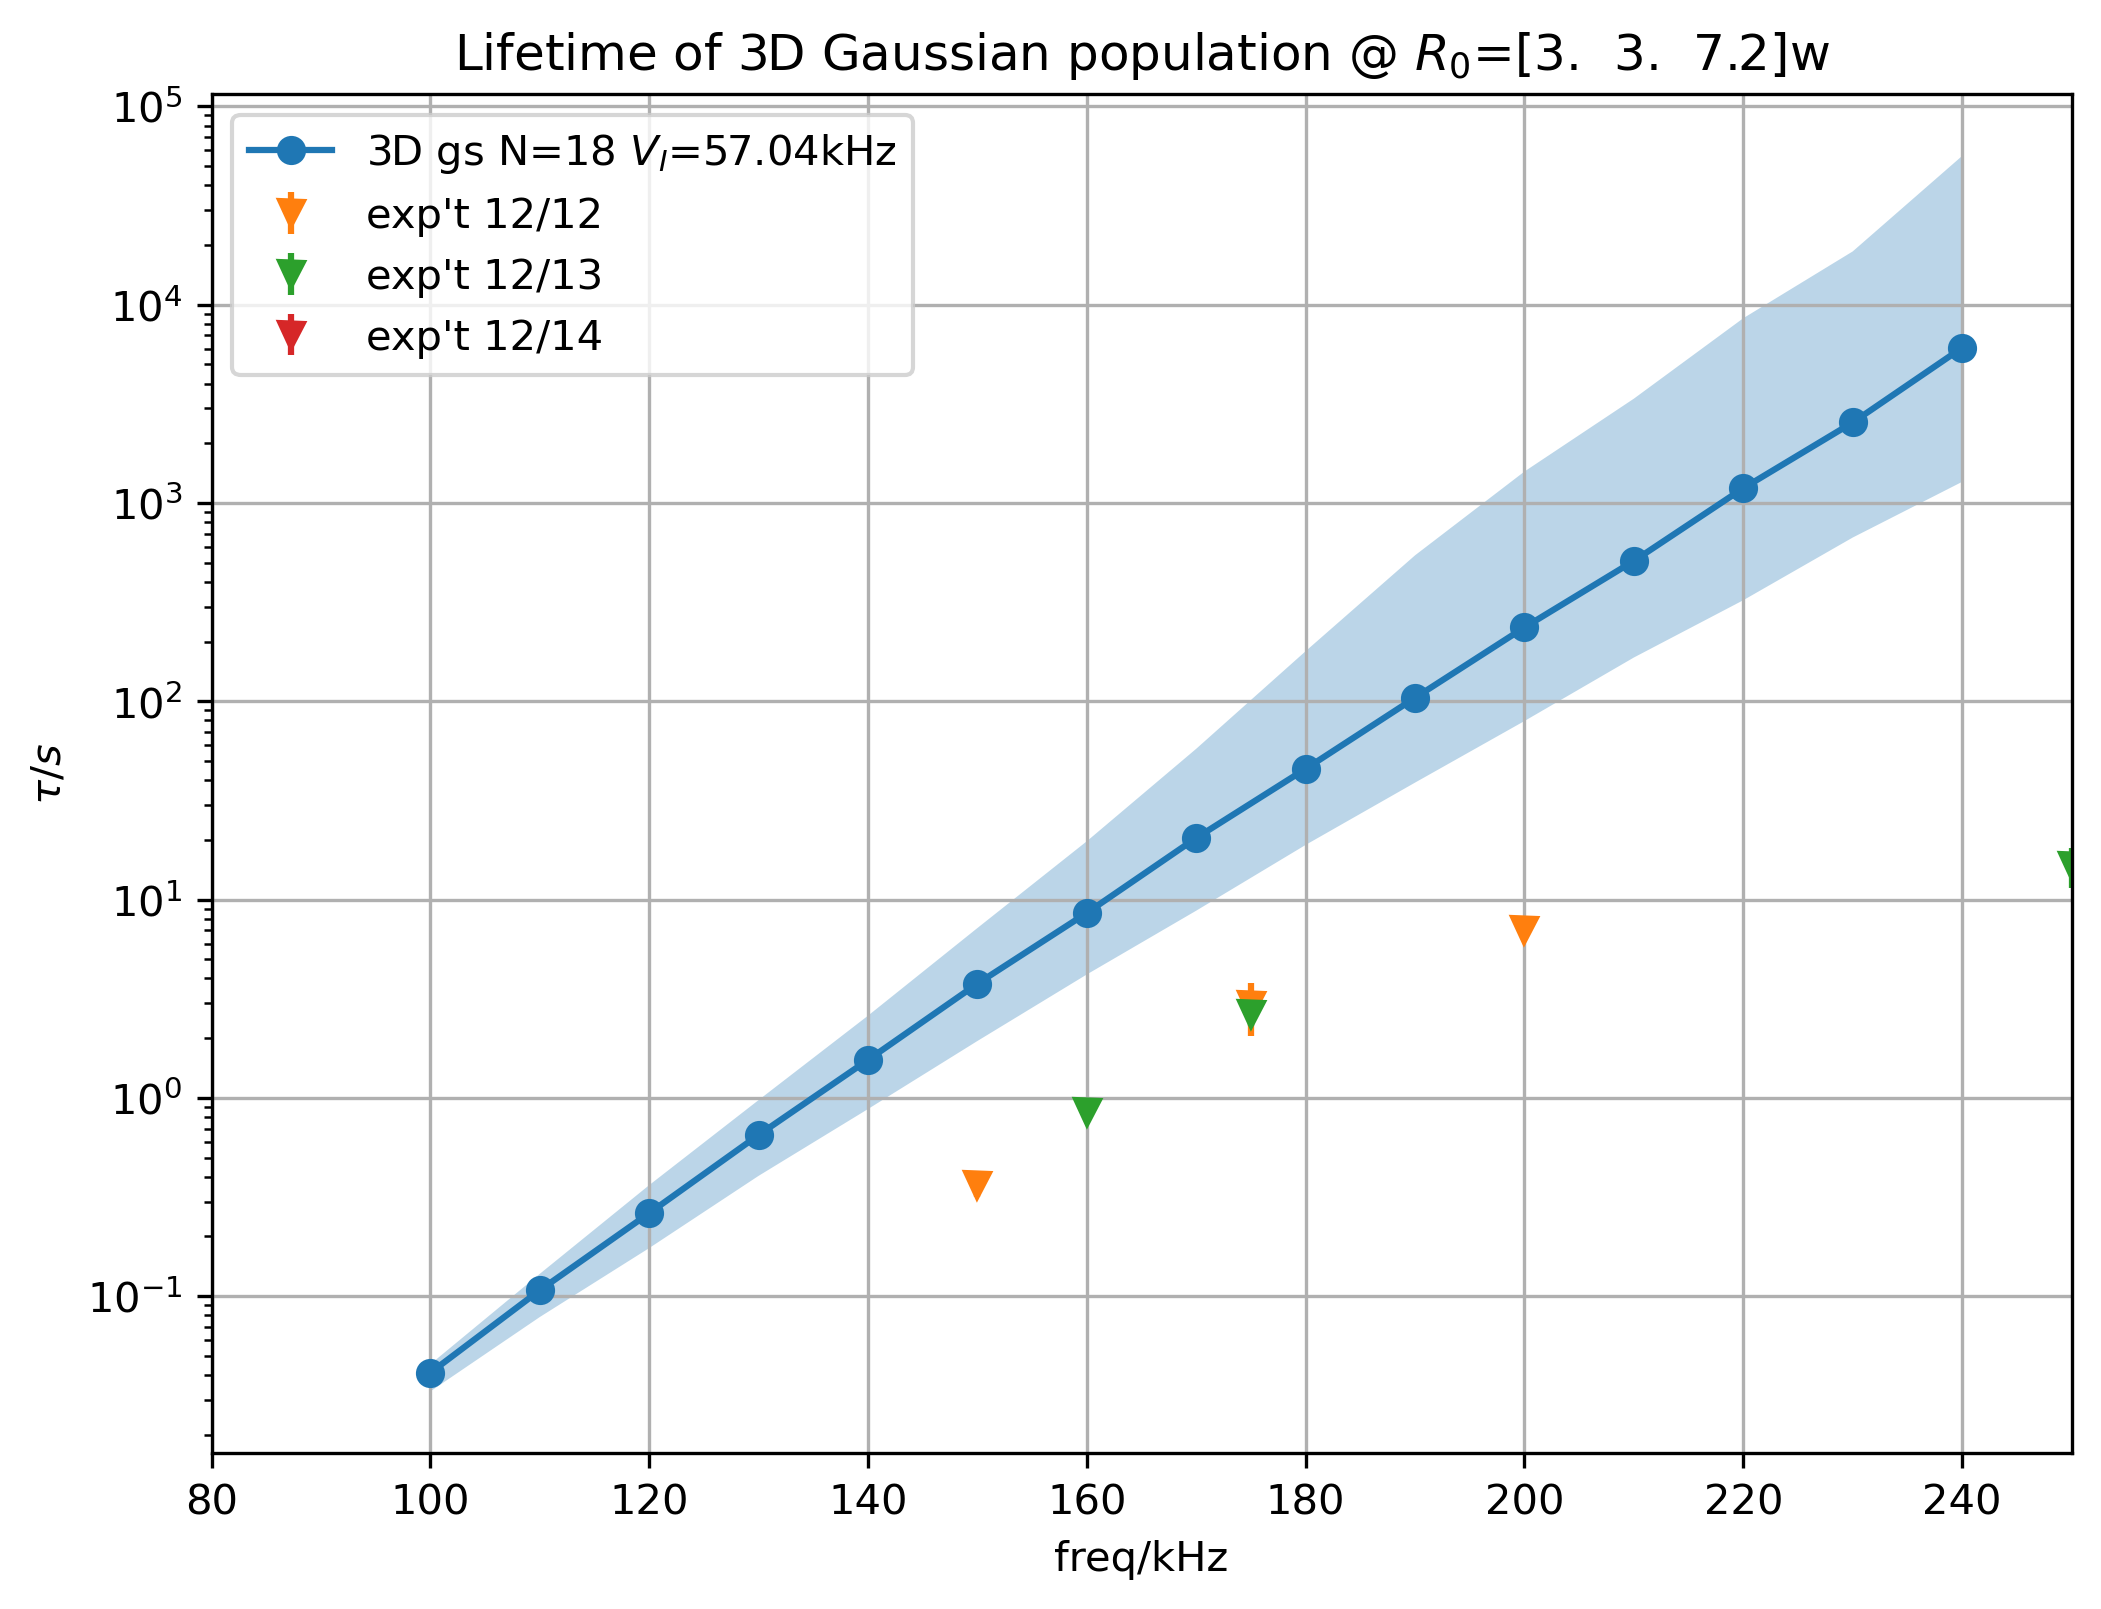

In [18]:
from plot_dynamics import *
import numpy as np
import matplotlib.pyplot as plt
from DVR_exe import *
import os

# N_list = range(12, 19, 2)
N = 18
N_list = range(N, N + 1, 2)
R = 3 * np.array([1, 1, 2.4])
freq_list = np.arange(100, 250, 10)
an = 0
# t0 = 17.9
t0 = np.inf
length = 1
sn = 1000.0

p = plot(cvg='N',
         quantity='gs',
         N=N,
         R0=R,
         freq_list=freq_list,
         dim=3,
         model='Gaussian',
         wavefunc=True,
         realtime=False,
         symmetry=True,
         absorber=True)

ax = plot_lifetime(N_list,
                   R0_list=[R for i in range(len(N_list))],
                   dvr=p,
                   err=True,
                   avg_no=an,
                   tau=t0)


In [ ]:
import numpy as np

N = 10000
a= np.random.rand(N)+ 1j* np.random.rand(N)
f1 = lambda a:np.linalg.norm(a)**2
f2 = lambda a:np.sum(np.abs(a)**2)
f3 = lambda a:np.inner(a.conj(),a).real
print(a.shape)
print(f1(a))
print(f2(a))
print(f3(a))
%timeit f1(a)
%timeit f2(a)
%timeit f3(a)

(10000,)
6627.3637784882285
6627.3637784882285
6627.363778488229


## Wavefunction dynamics

In [ ]:
from plot_dynamics import *
import numpy as np
import matplotlib.pyplot as plt
from DVR_exe import *
import os

N_list = range(18, 19, 1)
R = 3 * np.array([w, w, 2.4 * w])
freq_list = np.arange(0.12, 0.26, 0.04)
st = 2.5E-5 * np.exp(freq_list * 62.7)
st[np.nonzero(freq_list < .06)] = 1E-2
sn = 1000.0
plot_wavefunction(N_list,
                  R0_list=[R for i in range(len(N_list))],
                  freq_list=freq_list,
                  stop_time_list=st,
                  length=10,
                  step_no=sn,
                  dim=3,
                  symmetry=True,
                  model='Gaussian',
                  cvg='N',
                  realtime=False,
                  absorber=True)